# 1. Importing the required libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the data into the data frame.

In [204]:
#load theain and test dataset
train_df =pd.read_csv('Train_Dataset.csv')
test_df = pd.read_csv('Test_Dataset.csv')
sample_sub = pd.read_csv("Sample_Submission.csv")


let start by viewing the first few rows of each dataset to understand their structure.

In [205]:
# the top 5 rows of the  train dataset
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [206]:
# the top 5 rows of the  test dataset
test_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [239]:
# we need to rename age and sex columns as character case differ from the train data
test_df.rename(columns={'id':'Id','age':'Age','sex':'Sex'},inplace=True)
test_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,0.854167,1,0,0.650943,0.842466,0,2,0.755725,1,0.322581,1,0,1
1,10444,0.666667,1,0,0.349057,0.255708,0,2,0.022901,1,0.790323,2,2,2
2,14288,0.500000,1,0,0.009434,0.986301,1,1,0.015267,1,0.112903,1,1,0
3,10409,0.166667,0,1,0.792453,0.367580,0,1,0.923664,1,0.919355,1,0,0
4,17330,0.125000,0,3,0.094340,0.353881,0,0,0.389313,0,0.209677,1,4,3


In [208]:
# the top 5 rows of the  sample submittion dataset
sample_sub.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [209]:
#let view the botton 5 rows of the dataset
train_df.tail()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
7302,15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


In [210]:
# show the number of rows and columns of the dataset
train_df.shape

(7303, 15)

In [211]:
test_df.shape

(2697, 14)

In [212]:
#Checking the types of dataset
train_df.dtypes

Id            int64
Age           int64
Sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [213]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [214]:
# check for missing values
train_df.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [215]:
test_df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [216]:
# Checking for duplicate values
train_df.duplicated().sum()

np.int64(0)

In [217]:
#Checking for statistical distribution of the dataset, such mean, median, min, max and standard deviation
train_df.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='count'>

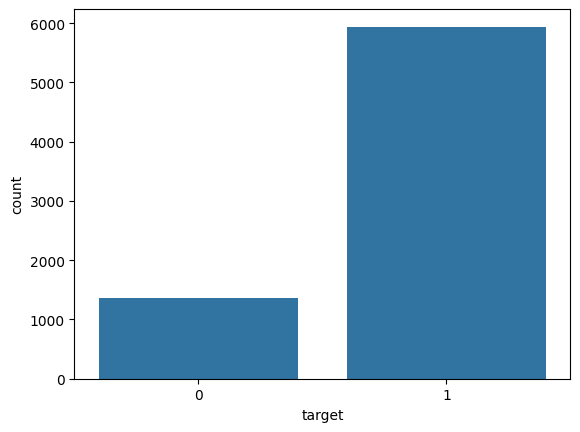

In [218]:
#let check the distribution of the target variables
sns.countplot(x=train_df['target'])

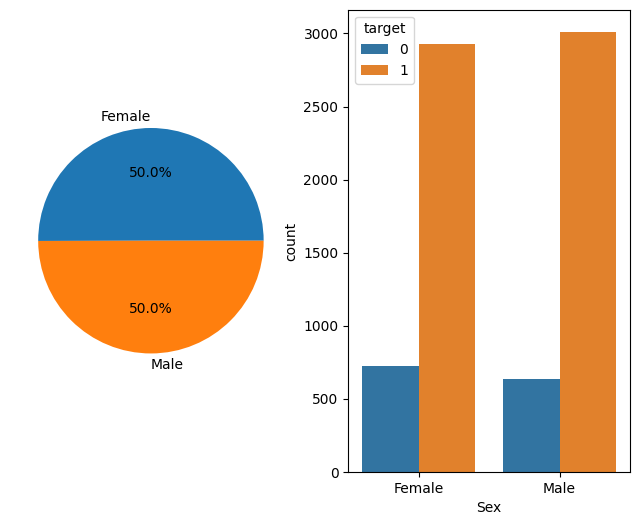

In [219]:
plt.figure(figsize=(8,6))
ax1=plt.subplot2grid((1,2),(0,0))
plt.pie(train_df['Sex'].value_counts(), labels=['Female','Male'], autopct='%1.1f%%')

ax2=plt.subplot2grid((1,2),(0,1))
# To visualize the sex distribution across the dataset
# Let create a countplot 

sns.countplot(x='Sex', hue='target',data=train_df)
plt.xticks([0,1],['Female','Male'])
plt.show()

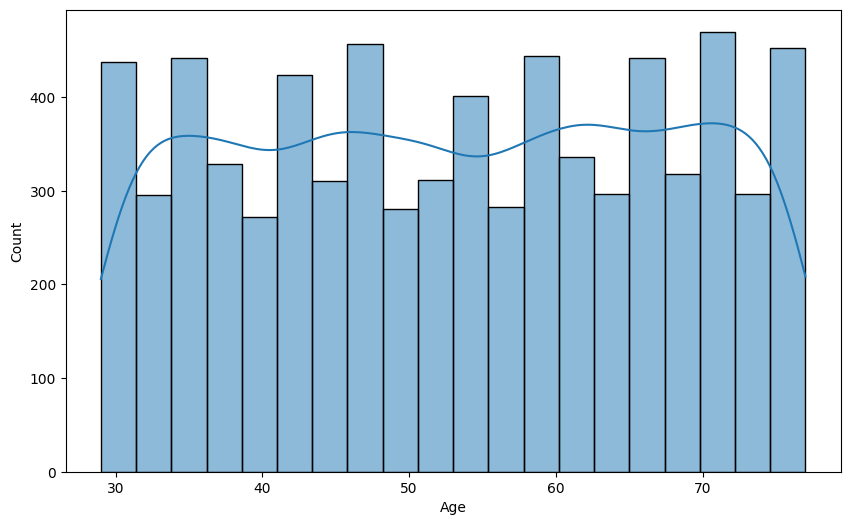

In [220]:
#To visualize the Age distribution, let create a Histogram
# this will help us easily see how ages are spread across the dataset
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], kde=True)
plt.show()

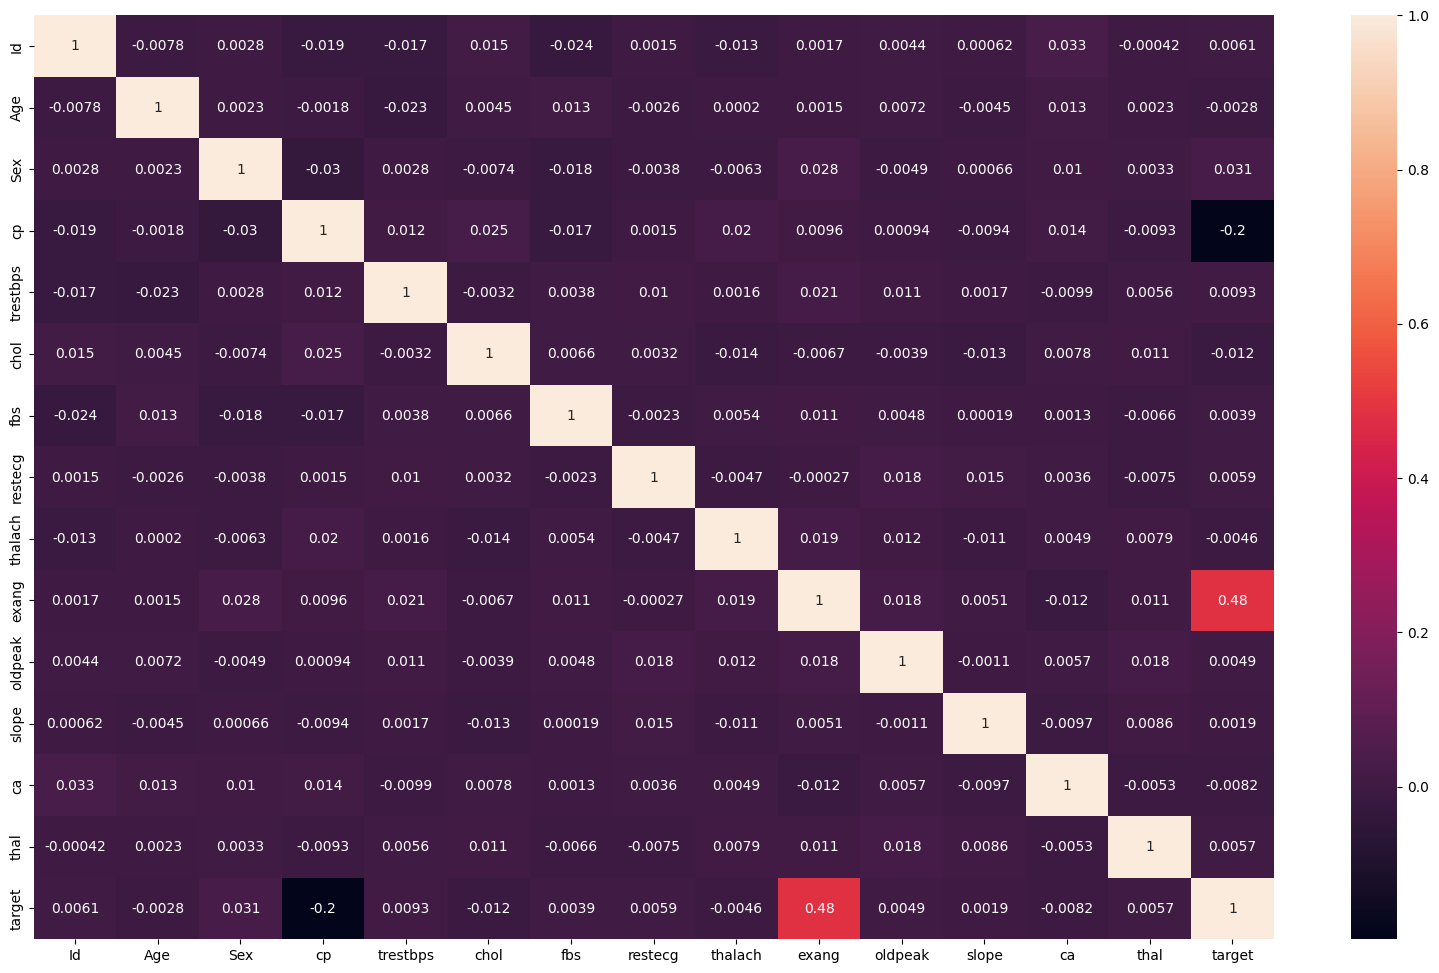

In [221]:
# let see the correlation among the variables
corr=train_df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.show()

# Data preprocessing

Spliting the Features and Target

In [222]:
# Dropping target variable from training data
target = train_df['target']
train = train_df.drop('target', axis=1)

In [223]:
#Drop Id as it is not important to trin model
train=train.drop(['Id'], axis=1)
train.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0


In [241]:
test=test_df.drop(['Id'], axis=1)

In [224]:
#Droping target variable from train dataset
x_train=train_df.drop(columns='target', axis=1)
y_train=train_df['target']
x_test=test_df


feature scaling

In [225]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler()
x_train[['Age','trestbps','thalach','oldpeak','chol']]=scaler.fit_transform(x_train[['Age','trestbps','thalach','oldpeak','chol']])
x_train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16167,0.083333,0,1,0.603774,0.180365,1,0,0.633588,0,0.241935,1,4,1
1,11275,0.500000,1,2,0.981132,0.063927,0,1,0.251908,0,0.129032,2,1,0
2,13251,0.166667,1,2,0.066038,0.173516,1,0,0.641221,0,0.338710,1,3,1
3,19921,0.958333,0,0,0.179245,0.410959,1,2,0.129771,1,0.790323,0,2,2
4,11293,0.125000,1,2,0.424528,0.668950,1,1,0.725191,1,0.145161,2,4,0


In [240]:
x_test[['Age','trestbps','thalach','oldpeak','chol']]=scaler.fit_transform(x_test[['Age','trestbps','thalach','oldpeak','chol']])
x_test.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,0.854167,1,0,0.650943,0.842466,0,2,0.755725,1,0.322581,1,0,1
1,10444,0.666667,1,0,0.349057,0.255708,0,2,0.022901,1,0.790323,2,2,2
2,14288,0.500000,1,0,0.009434,0.986301,1,1,0.015267,1,0.112903,1,1,0
3,10409,0.166667,0,1,0.792453,0.367580,0,1,0.923664,1,0.919355,1,0,0
4,17330,0.125000,0,3,0.094340,0.353881,0,0,0.389313,0,0.209677,1,4,3


# Cross Validation 

In [227]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Function initializing baseline machine learning model
def GetBasedModel():
    basedmodels=[]
    basedmodels.append(('LR_R2',LogisticRegression(penalty=2)))
    basedmodels.append(('KNN7',KNeighborsClassifier(7)))
    basedmodels.append(('CART',DecisionTreeClassifier()))
    basedmodels.append(('NB',GaussianNB()))
    basedmodels.append(('RF_Ent100',RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedmodels.append(('RF_Gini100',RandomForestClassifier(criterion='gini',n_estimators=100)))
    
    return basedmodels



In [228]:
# Function for performing 10-fold cross-validation of all baseline models
def BasedLine2(x_train, y_train, models):
    # Test options and evaluation metrics
    num_fold = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []

    # Ensure models is a dictionary or a list of tuples
    # if not isinstance(models, dict):
    #     models = {type(model).__name__: model for model in models}

    for name, model in models:
        kfold=model_selection.KFold(n_splits=10)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return names, results

# # Function to get baseline models
# def GetBasedModel():


#     models = {
#         'Logistic Regression': LogisticRegression(max_iter=1000),
#         'Decision Tree': DecisionTreeClassifier(),
#         'Random Forest': RandomForestClassifier(n_estimators=100),
#         'SVM': SVC(),
#         'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
#     }
#     return models


# Get baseline models
models = GetBasedModel()

# Perform cross-validation
names, results = BasedLine2(x_train, y_train, models)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\SAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\SAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 2 instead.


In [167]:
# Function for performing 10_fold cross vvalidation of all the baseline modelss
def BasedLine2(x_train,y_train, models):
    # test option and evaluation metrics
    num_fold=10
    scoring='accuracy'
    seed=7
    results=[]
    names=[]
    for name, model in models:
        kfold=model_selection.KFold(n_splits=10)
        cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return names, results

models= GetBasedModel()
names,result=BasedLine2(x_train,y_train, models)

TypeError: 'NoneType' object is not iterable

In [166]:
models= GetBasedModel()
names,result=BasedLine2(x_train,y_train, models)

TypeError: 'NoneType' object is not iterable

Model training

In [184]:
# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split

# Spliting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(train,target,train_size=0.2,random_state=42)

In [185]:
# training the Random Forest model with train dataset
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Model evaluation

In [192]:
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

# Accuracy score on train dataset
x_train_prediction=model.predict(x_train)
train_data_acccuracy=accuracy_score(x_train_prediction,y_train)

print('Accuracy score on train dataset:',train_data_acccuracy)

Accuracy score on train dataset: 1.0


building a predictive system

In [187]:
#let predict the test dataset
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 1])

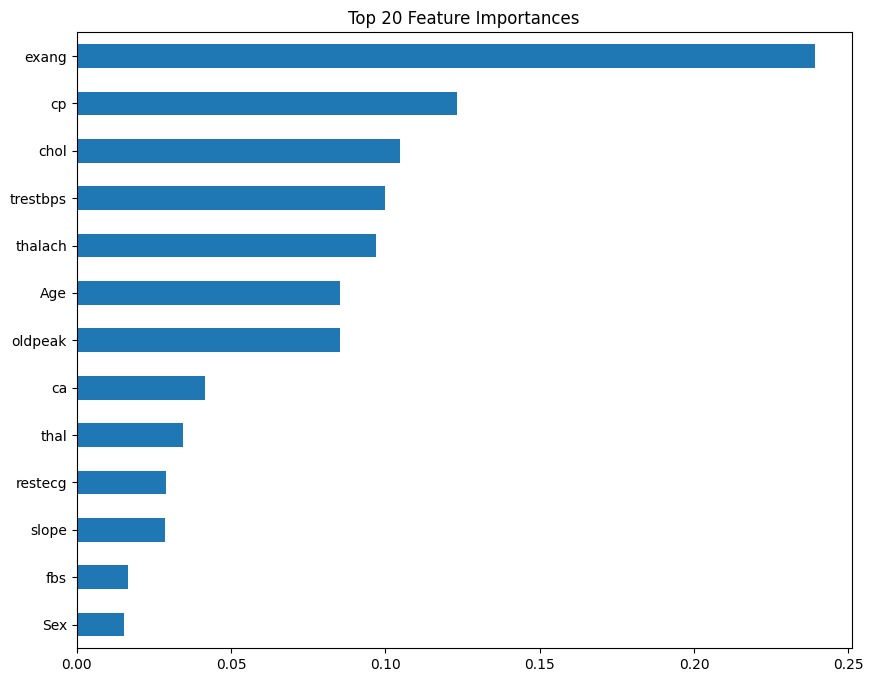

In [193]:
# Get the feature importances from the classifier
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.show()

In [246]:
# Get predictions from the Random Forest model
predictions = model.predict_proba(test)[:, 1]

# Create a copy of the sample submission file
baseline_sub = sample_sub.copy()

# Add the predicted probabilities to the submission file
baseline_sub['target'] = predictions

# Save the submission file to a CSV
baseline_sub.to_csv('hehart_dx_submittion.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,Id,target
0,16501,0.88
1,10444,0.86
2,14288,0.86
3,10409,0.80
4,17330,0.47
